In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns; sns.set(style="ticks", color_codes=True)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/Users/agar/_METIS/exercises/Project_3/data_source/complete_df') 

In [4]:
#assess influential predictors, looks like only sum_flips_total is helpful
df.groupby('party_change_simple').mean()

,Unnamed: 0,year,sum_flips_total,state_fips,candidate_votes,totalvotes,metro1_percent_pop,metro2_percent_pop,metro3_percent_pop,metro_none_percent_pop,larg1_percent_pop,larg2_percent_pop,larg3_percent_pop,white_adult_percent,black_adult_percent,latino_adult_percent,asian_adult_percent,native_adult_percent,other_adult_percent,bachelors,white_bachelors,white_no_college,income_median,total_vote,white_vote,black_vote,latino_vote,asian_vote,native_vote,other_vote,total_pop,white_pop,black_pop,latino_pop,asian_pop,native_pop,other_pop
party_change_simple,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1119.265772,2014.117238,1.416294,27.450571,154506.919026,243321.366617,69.066567,12.205216,5.127869,5.892996,26.299354,8.533184,5.718132,65.608743,12.118182,14.479384,5.132588,0.666021,1.584799,30.708197,35.983159,43.792250,59637.854943,535932.835072,355312.546945,65301.201192,75944.210134,27698.309488,3598.327372,8567.101341,705800.380030,445099.911575,90284.020368,115057.191257,35520.891207,5050.053651,15539.418281
1.0,1064.925926,2013.250000,2.754630,26.004630,136309.365741,250606.675926,66.496296,13.068981,5.504630,6.805556,20.698148,8.542130,5.825000,69.959722,8.568056,14.500926,3.988889,0.765278,1.355093,29.838889,33.569907,47.543981,59805.365741,532752.638889,378660.375000,46244.509259,75604.875000,21213.546296,4131.643519,7261.379630,701313.680556,475577.217593,64365.175926,114594.013889,27680.513889,5888.717593,13793.356481


In [5]:
#get pandas and sql to work together
import psycopg2 as pg
import pandas.io.sql as pd_sql

from psycopg2 import connect
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

params = {
    'host': 'localhost',  # We are connecting to our _local_ version of psql
    'user': 'agar',
    'dbname': 'votes',    # DB that we are connecting to
    'port': 5432          # port we opened on AWS
}

# We will talk about this magic Python trick!
connection = pg.connect(**params)

In [6]:
sql_query_multiclass = """
select * 
from "Party_change_multiclass"
where year>2009 and year<2019 
"""

In [7]:
df_multiclass = pd.read_sql_query(sql_query_multiclass, connection, index_col=None, coerce_float=True, params=None, parse_dates=None, chunksize=None)

In [8]:
df_multiclass.columns

Index(['year', 'party', 'district_id', 'party_id', 'PREV_YEAR',
       'PREV_PARTY_ID', 'party change'],
      dtype='object')

In [9]:
df_multiclass = df_multiclass.drop(['PREV_YEAR', 'party_id', 'party'], axis=1)

In [10]:
#feature engineering: amplify sum_flips_total
df["flips_sq"] = df["sum_flips_total"]**2
df = df.drop('Unnamed: 0', axis = 1)
df.to_csv('/Users/agar/_METIS/exercises/Project_3/data_source/engineered_data') 


In [11]:
df.head()

,year,district_id,party_change_simple,sum_flips_total,party,state_fips,candidate_votes,totalvotes,metro1_percent_pop,metro2_percent_pop,metro3_percent_pop,metro_none_percent_pop,larg1_percent_pop,larg2_percent_pop,larg3_percent_pop,white_adult_percent,black_adult_percent,latino_adult_percent,asian_adult_percent,native_adult_percent,other_adult_percent,bachelors,white_bachelors,white_no_college,income_median,total_vote,white_vote,black_vote,latino_vote,asian_vote,native_vote,other_vote,total_pop,white_pop,black_pop,latino_pop,asian_pop,native_pop,other_pop,flips_sq
0,2010,AK-00,0.0,0.0,republican,2,175384,254335.0,53.6,13.7,4.4,26.3,41.1,4.4,4.4,68.4,3.1,4.7,6.2,13.2,4.5,29.6,36.7,42.9,76440.0,521588.0,356564.0,16051.0,24290.0,32158.0,69054.0,23471.0,708570.0,454831.0,21862.0,39038.0,44357.0,102124.0,46358.0,0.0
1,2012,AK-00,0.0,0.0,republican,2,185296,289804.0,53.6,13.7,4.4,26.3,41.1,4.4,4.4,68.4,3.1,4.7,6.2,13.2,4.5,29.6,36.7,42.9,76440.0,521588.0,356564.0,16051.0,24290.0,32158.0,69054.0,23471.0,708570.0,454831.0,21862.0,39038.0,44357.0,102124.0,46358.0,0.0
2,2014,AK-00,0.0,0.0,republican,2,142572,279741.0,53.6,13.7,4.4,26.3,41.1,4.4,4.4,68.4,3.1,4.7,6.2,13.2,4.5,29.6,36.7,42.9,76440.0,521588.0,356564.0,16051.0,24290.0,32158.0,69054.0,23471.0,708570.0,454831.0,21862.0,39038.0,44357.0,102124.0,46358.0,0.0
3,2016,AK-00,0.0,0.0,republican,2,155088,308198.0,53.6,13.7,4.4,26.3,41.1,4.4,4.4,68.4,3.1,4.7,6.2,13.2,4.5,29.6,36.7,42.9,76440.0,521588.0,356564.0,16051.0,24290.0,32158.0,69054.0,23471.0,708570.0,454831.0,21862.0,39038.0,44357.0,102124.0,46358.0,0.0
4,2018,AK-00,0.0,0.0,republican,2,149779,282166.0,53.6,13.7,4.4,26.3,41.1,4.4,4.4,68.4,3.1,4.7,6.2,13.2,4.5,29.6,36.7,42.9,76440.0,521588.0,356564.0,16051.0,24290.0,32158.0,69054.0,23471.0,708570.0,454831.0,21862.0,39038.0,44357.0,102124.0,46358.0,0.0


In [12]:
multiclass_df = pd.merge(df, df_multiclass, how='left', on=["year", "district_id"])

In [13]:
multiclass_df.columns

Index(['year', 'district_id', 'party_change_simple', 'sum_flips_total',
       'party', 'state_fips', 'candidate_votes', 'totalvotes',
       'metro1_percent_pop', 'metro2_percent_pop', 'metro3_percent_pop',
       'metro_none_percent_pop', 'larg1_percent_pop', 'larg2_percent_pop',
       'larg3_percent_pop', 'white_adult_percent', 'black_adult_percent',
       'latino_adult_percent', 'asian_adult_percent', 'native_adult_percent',
       'other_adult_percent', 'bachelors', 'white_bachelors',
       'white_no_college', 'income_median', 'total_vote', 'white_vote',
       'black_vote', 'latino_vote', 'asian_vote', 'native_vote', 'other_vote',
       'total_pop', 'white_pop', 'black_pop', 'latino_pop', 'asian_pop',
       'native_pop', 'other_pop', 'flips_sq', 'PREV_PARTY_ID', 'party change'],
      dtype='object')

In [53]:
multiclass_df = multiclass_df.drop('party_change_simple', axis=1)

In [63]:
from sqlalchemy import create_engine
connection_string = f'postgres://agar:{params["host"]}@{params["host"]}:{params["port"]}/votes'
engine = create_engine(connection_string, pool_pre_ping=True)

multiclass_df.iloc[:0].to_sql("Multiclass_complete", engine, index=False)
multiclass_df.iloc[:].to_sql("Multiclass_complete", engine, index=False, if_exists = 'append', chunksize = 1000)

In [57]:
df_history = multiclass_df[['party change', 'year', 'district_id', 'sum_flips_total', 'flips_sq']]
df_metro_pops = multiclass_df[['party change', 'metro1_percent_pop', 'metro2_percent_pop', 'metro3_percent_pop',
       'metro_none_percent_pop']]
df_larg_pops = multiclass_df[['party change', 'larg1_percent_pop', 'larg2_percent_pop',
       'larg3_percent_pop']]
df_edu_inc = multiclass_df[['party change', 'bachelors', 'white_bachelors',
       'white_no_college', 'income_median']]
df_race_vote = multiclass_df[['party change', 'white_vote',
       'black_vote', 'latino_vote', 'asian_vote', 'native_vote', 'other_vote',]]

KeyError: 'party_change_simple'

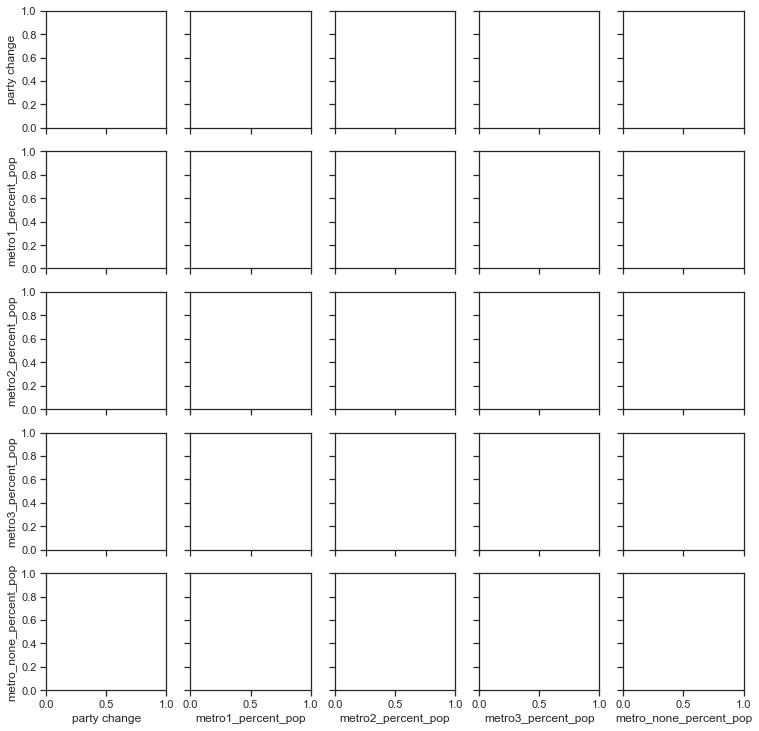

In [58]:
sns.pairplot(df_metro_pops, hue='party_change_simple')
plt.savefig('/Users/agar/_METIS/exercises/Project_3/data_source/metro_pops.pdf')

/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


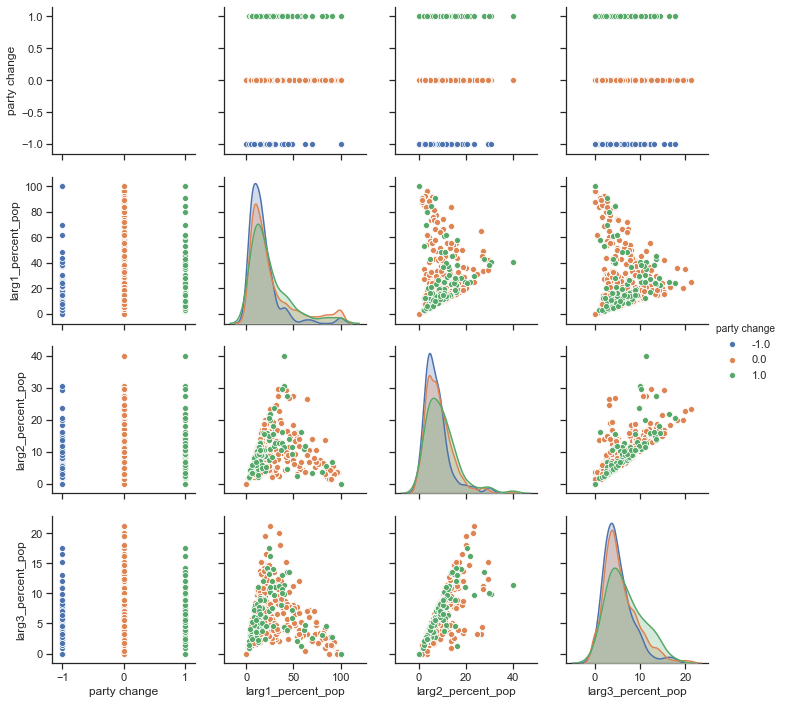

In [59]:
sns.pairplot(df_larg_pops , hue='party change')
plt.savefig('/Users/agar/_METIS/exercises/Project_3/data_source/large_pops_mc.pdf')

/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


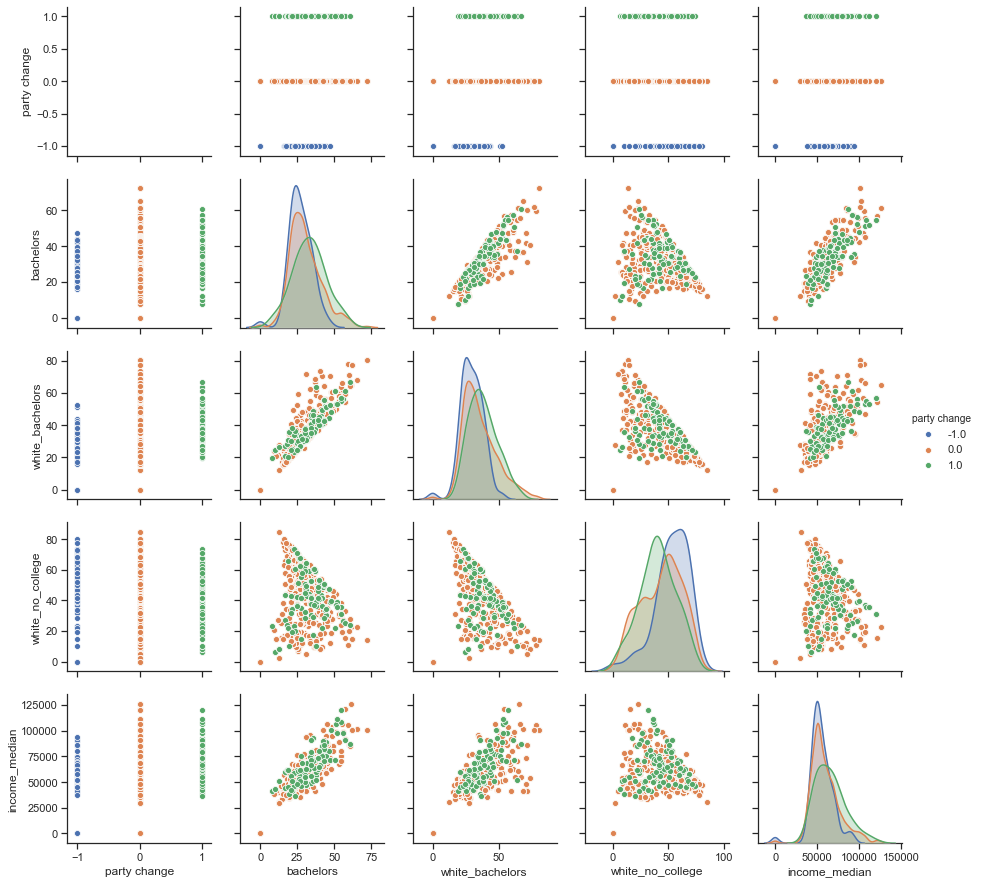

In [60]:
sns.pairplot(df_edu_inc, hue='party change')
plt.savefig('/Users/agar/_METIS/exercises/Project_3/data_source/edu_inc_mc.pdf')

/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


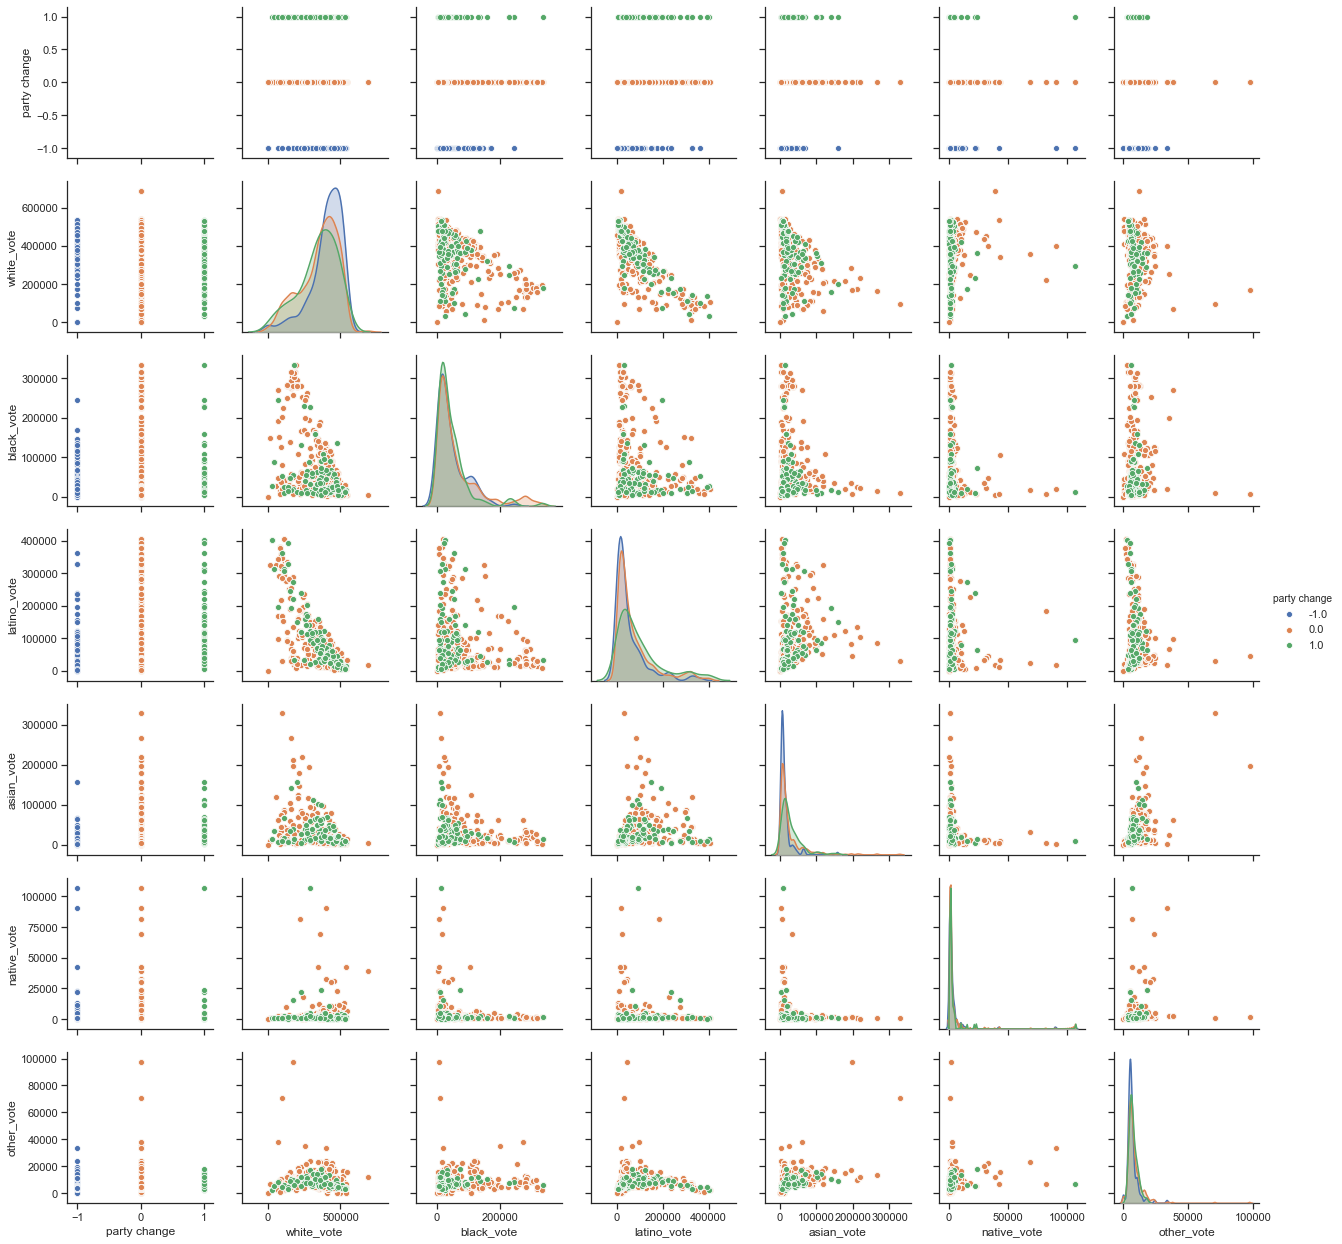

In [62]:
 sns.pairplot(df_race_vote, hue='party change')
plt.savefig('/Users/agar/_METIS/exercises/Project_3/data_source/race_mc.pdf')

In [1]:
sns.pairplot(df_history, hue='party change')
plt.savefig('/Users/agar/_METIS/exercises/Project_3/data_source/history_mc.pdf')

NameError: name 'sns' is not defined

In [66]:
multiclass_df.columns

Index(['year', 'district_id', 'sum_flips_total', 'party', 'state_fips',
       'candidate_votes', 'totalvotes', 'metro1_percent_pop',
       'metro2_percent_pop', 'metro3_percent_pop', 'metro_none_percent_pop',
       'larg1_percent_pop', 'larg2_percent_pop', 'larg3_percent_pop',
       'white_adult_percent', 'black_adult_percent', 'latino_adult_percent',
       'asian_adult_percent', 'native_adult_percent', 'other_adult_percent',
       'bachelors', 'white_bachelors', 'white_no_college', 'income_median',
       'total_vote', 'white_vote', 'black_vote', 'latino_vote', 'asian_vote',
       'native_vote', 'other_vote', 'total_pop', 'white_pop', 'black_pop',
       'latino_pop', 'asian_pop', 'native_pop', 'other_pop', 'flips_sq',
       'PREV_PARTY_ID', 'party change'],
      dtype='object')

In [77]:
multiclass_df = multiclass_df.fillna(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2228
Data columns (total 41 columns):
year                      2229 non-null int64
district_id               2229 non-null object
sum_flips_total           2229 non-null float64
party                     2229 non-null object
state_fips                2229 non-null int64
candidate_votes           2229 non-null int64
totalvotes                2229 non-null float64
metro1_percent_pop        2229 non-null float64
metro2_percent_pop        2229 non-null float64
metro3_percent_pop        2229 non-null float64
metro_none_percent_pop    2229 non-null float64
larg1_percent_pop         2229 non-null float64
larg2_percent_pop         2229 non-null float64
larg3_percent_pop         2229 non-null float64
white_adult_percent       2229 non-null float64
black_adult_percent       2229 non-null float64
latino_adult_percent      2229 non-null float64
asian_adult_percent       2229 non-null float64
native_adult_percent      2229 non-nu

In [78]:
#define X feature and y target
y = multiclass_df['party change']
X = multiclass_df.drop(['party change',"party", "candidate_votes", "totalvotes", 'district_id'], axis = 1)

In [79]:
X.columns

Index(['year', 'sum_flips_total', 'state_fips', 'metro1_percent_pop',
       'metro2_percent_pop', 'metro3_percent_pop', 'metro_none_percent_pop',
       'larg1_percent_pop', 'larg2_percent_pop', 'larg3_percent_pop',
       'white_adult_percent', 'black_adult_percent', 'latino_adult_percent',
       'asian_adult_percent', 'native_adult_percent', 'other_adult_percent',
       'bachelors', 'white_bachelors', 'white_no_college', 'income_median',
       'total_vote', 'white_vote', 'black_vote', 'latino_vote', 'asian_vote',
       'native_vote', 'other_vote', 'total_pop', 'white_pop', 'black_pop',
       'latino_pop', 'asian_pop', 'native_pop', 'other_pop', 'flips_sq',
       'PREV_PARTY_ID'],
      dtype='object')

In [80]:
#scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = ['year', 'sum_flips_total', 'state_fips', 'metro1_percent_pop',
       'metro2_percent_pop', 'metro3_percent_pop', 'metro_none_percent_pop',
       'larg1_percent_pop', 'larg2_percent_pop', 'larg3_percent_pop',
       'white_adult_percent', 'black_adult_percent', 'latino_adult_percent',
       'asian_adult_percent', 'native_adult_percent', 'other_adult_percent',
       'bachelors', 'white_bachelors', 'white_no_college', 'income_median',
       'total_vote', 'white_vote', 'black_vote', 'latino_vote', 'asian_vote',
       'native_vote', 'other_vote', 'total_pop', 'white_pop', 'black_pop',
       'latino_pop', 'asian_pop', 'native_pop', 'other_pop', 'flips_sq',
       'PREV_PARTY_ID'])

In [81]:
from collections import Counter
print(sorted(Counter(y).items()))

[(-1.0, 120), (0.0, 2013), (1.0, 96)]


In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

X_resampled, y_resampled = SMOTE().fit_resample(X_scaled_df, y)


In [ ]:
from collections import Counter
print(sorted(Counter(y_resampled).items()))

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, random_state=42, stratify = y)

In [83]:
y_train.shape

(1671,)

In [84]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, random_state=42, stratify = y_train)

In [85]:
## Here are some possible models to use, but feel free to import whichever ones you like
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

In [86]:
lr=LogisticRegression(max_iter=10000)

In [87]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
lr.score(X_test,y_test)

0.910394265232975

In [89]:
y_pred=lr.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 11,  19,   0],
       [  6, 495,   3],
       [  0,  22,   2]])

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_tr, y_tr)
print("Training: {:6.2f}%".format(100*knn.score(X_tr, y_tr)))
print("Test set: {:6.2f}%".format(100*knn.score(X_val, y_val)))

Training:  91.62%
Test set:  88.52%


In [ ]:
accuracy = []
kvals = []
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    kvals.append(k)
    accuracy.append(100*knn.score(X_test, y_test))
plt.plot(kvals, accuracy)

In [93]:
from sklearn.metrics import roc_auc_score, roc_curve

In [94]:
def roc(model, title):
    fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:,1])
    plt.plot(fpr, tpr,lw=2)
    plt.plot([0,1],[0,1],c='violet',ls='--')
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('{} ROC curve'.format(title));
    print("{} ROC AUC score = ".format(title), roc_auc_score(y_val, model.predict_proba(X_val)[:,1]))

In [96]:
Logistic_scores = cross_val_score(lr, X_train, y_train, cv=5)
print("Logistic Scores", Logistic_scores)

Logistic Scores [0.91044776 0.91017964 0.91616766 0.91916168 0.89520958]


In [ ]:
###trying to get roc auc curve in k-folds...


import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold


# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=3)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=42)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
for (train, test), color in zip(cv.split(X_train, y_train), colors):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= cv.get_n_splits(X_train, y_train)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()